<a href="https://colab.research.google.com/github/rsonar821/EDA-Capstone-Project/blob/main/Airbnb_EDA_Capstone_Project_(Raj_Sonar).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Airbnb EDA (Exploratory Data Analysis) Capstone Project**

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.
This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values.

---------------------------------------------------------------------------------

**Explore and analyze the data to discover key understandings (not limited to these) such as :**
* **What can we learn about different hosts and areas?**
* **What can we learn from predictions? (ex: locations, prices, reviews, etc)**
* **Which hosts are the busiest and why?**
* **Is there any noticeable difference of traffic among different areas and what could be the reason for it?**
--------------------------------------------------------------------------------

# **Business Model of Airbnb:**
 **Airbnb is a community-based, two-sided online platform that facilitates the process of booking private living spaces for travelers. On the one side it enables owners to list their space and earn rental money. On the other side it provides travelers easy access to renting private homes. With over 1,500,000 listings in 34,000 cities and 190 countries, its wide coverage enables travelers to rent private homes all over the world. Personal profiles as well as a rating and reviewing system provide information about the host and what is on offer. Vice versa, hosts can choose on their own who to rent out their space to.**

 **Airbnb receives commissions from two sources upon every booking, namely from the hosts and guests. For every booking Airbnb charges the guest 6-12% of the booking fee. Moreover Airbnb charges the host 3% for every successful transaction.**

# **CODING AND ANALYSIS PART:**

In [ ]:
# Importing modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [ ]:
# Mounting google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading the dataset

df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AlmaBetter/EDA Capstone Project/Airbnb NYC 2019.csv')

# **Analysing the Data**

In [ ]:
# Printing the first 5 rows

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
# Printing the last 5 rows

df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [ ]:
# Checking the shape of the dataset

df.shape

(48895, 16)

In [ ]:
# Checking the basic information of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
# Checking the unique values of the host id column

df['host_id'].nunique()

37457

In [ ]:
# Checking the unique values of the neighbourhood group

df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [ ]:
# Checking the unique values of the room type

df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

**Information provided by each column:**


*   **id:** It gives a unique number for each observation.
*   **name:** Basic description of the provided Airbnb.

*   **host_id:** This gives us the id of the host who owns the Airbnb.
*   **host_name:** This gives us the name of the host who owns the Airbnb.
*   **neighbourhood_group:** The 5 boroughs(a town or district which is an administrative unit) of the New York City.
*   **neighbourhood:** Towns/Cities present in the 5 boroughs.
*   **latitude:** Latitude of the Airbnb.
*   **longitude:** Longitude of the Airbnb.
*   **room_type:** Different room types available for the Airbnb booking.
 1.   Entire Home/Apartment
 2.   Private Room
 3.   Shared Room
*   **price:** Price of the Airbnb for one night.
*   **minimum_nights:** Number of minimun nights spent by a person in the Airbnb.
*   **number_of_reviews:** Number of reviews received by the Airbnb.
*   **last_review:** Date of the last review given by the user.
*   **reviews_per_month:** Mean number of reviews received by the Airbnb per month.
*   **calculated_host_listings_count:** Count of the list of hosts.
*   **availability_365:** Availability of the Airbnb out of 365 days.

### **Data Preprocessing**

In [ ]:
# Dropping the columns that are not required

df.drop(columns=['name','host_name','latitude','longitude','last_review','calculated_host_listings_count'], inplace = True)

If there are Nan values in the reviews per month column that means those Airbnbs have not received the reviews and thus those Nan values can be replaced with 0.

In [ ]:
# Replacing the null values of reviews per month column with 0

df[['reviews_per_month']] = df[['reviews_per_month']].fillna(0)

The price of any Airbnb can not be equal to 0, so replacing the 0 priced Airbnbs with the median of the price column

In [ ]:
# Replacing the 0 priced Airbnbs with the median of the price column

df['price'] = df['price'].replace(0,np.median(df['price']))

In [ ]:
# Statistical Description of the Dataset

df.describe()

,id,host_id,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,152.744534,7.029962,23.274466,1.090910,112.781327
std,1.098311e+07,7.861097e+07,240.144266,20.510550,44.550582,1.597283,131.622289
min,2.539000e+03,2.438000e+03,10.000000,1.000000,0.000000,0.000000,0.000000
25%,9.471945e+06,7.822033e+06,69.000000,1.000000,1.000000,0.040000,0.000000
50%,1.967728e+07,3.079382e+07,106.000000,3.000000,5.000000,0.370000,45.000000
75%,2.915218e+07,1.074344e+08,175.000000,5.000000,24.000000,1.580000,227.000000
max,3.648724e+07,2.743213e+08,10000.000000,1250.000000,629.000000,58.500000,365.000000


## Classifying the categorical and numerical data:

*   **Categorical:**

 1. host_id 
 2. neighbourhood_group
 3. neighbourhood
 4. room_type


*   **Numerical:**

 1. price
 2. minimum_nights
 3. number_of_reviews
 4. reviews_per_month
 5. availability_365

# **Univariate Analysis:**
**It involves the analysis of a single variable**

## **Top 10 host IDs that owns the maximum number of Airbnbs in the New York City**

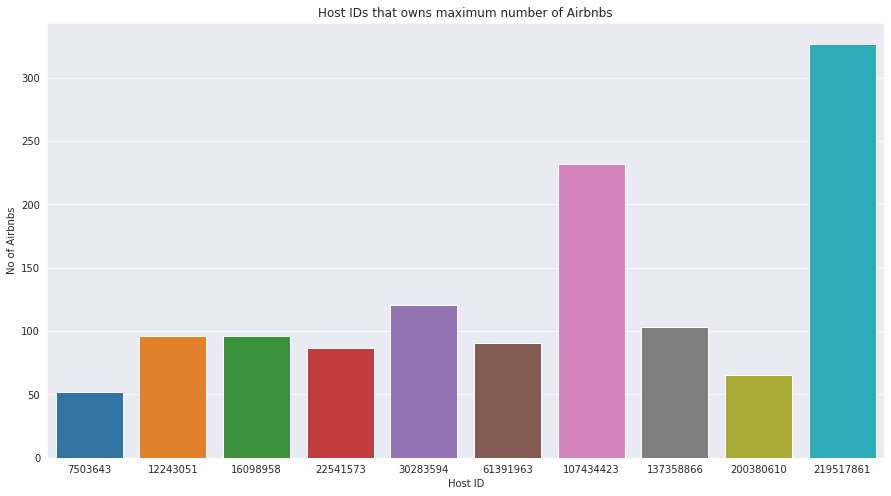

In [ ]:
# Creating a dataframe representing the top 10 host IDs who own maximum number of Airbnbs
top_10_host_id = pd.DataFrame({'Host ID':df['host_id'].value_counts(ascending=False).index,
                               'No of Airbnbs':df['host_id'].value_counts(ascending=False).values})[:10]

# Defining the size of the plot
fig,ax=plt.subplots(figsize=(15,8))

# Plotting a bar graph
figure = sns.barplot(x='Host ID', y='No of Airbnbs', data = top_10_host_id)

# Defining the title of the graph
figure.set(title='Host IDs that owns maximum number of Airbnbs')

# Displaying the graph
plt.show(figure)

## **Distribution of the Airbnbs in the neighbourhood groups**

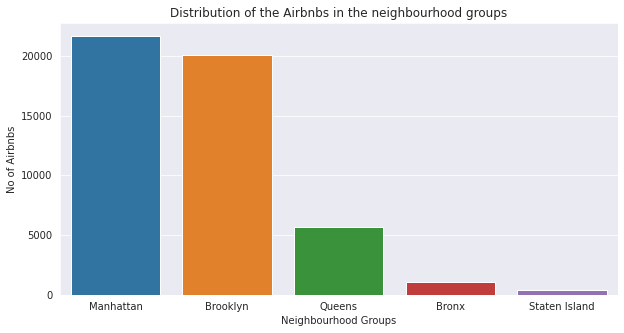



Percentage distribution of Airbnbs in the neighbourhood groups:


Manhattan        44.301053
Brooklyn         41.116679
Queens           11.588097
Bronx             2.231312
Staten Island     0.762859
Name: neighbourhood_group, dtype: float64

In [ ]:
# Creating a dataframe representing the distribution of Airbnbs in the neighbourhood groups
airbnb_count = pd.DataFrame({'Neighbourhood Groups':df['neighbourhood_group'].value_counts(ascending=False).index,
                             'No of Airbnbs':df['neighbourhood_group'].value_counts(ascending=False).values})

# Defining the size of the plot
plt.figure(figsize=(10,5))

# Plotting a bar graph
figure = sns.barplot(x='Neighbourhood Groups', y='No of Airbnbs', data = airbnb_count)

# Defining the title of the graph
figure.set(title='Distribution of the Airbnbs in the neighbourhood groups')

# Displaying the graph
plt.show(figure)

# Percentage distribution of the Airbnbs in the neighbourhood groups  
print('\n\nPercentage distribution of Airbnbs in the neighbourhood groups:')
df['neighbourhood_group'].value_counts(normalize=True)*100

## **Distribution of Airbnbs on the basis of room types**

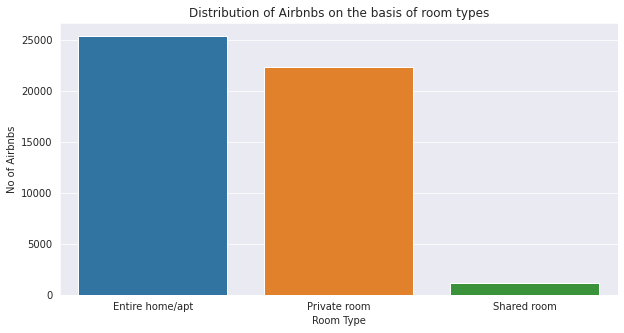



Percentage distribution of Airbnbs on the basis of room types:


Entire home/apt    51.966459
Private room       45.661111
Shared room         2.372431
Name: room_type, dtype: float64

In [ ]:
# Creating a dataframe representing the distribution of Airbnbs on the basis of room types
room_type_count = pd.DataFrame({'Room Type':df['room_type'].value_counts(ascending=False).index,
                                'No of Airbnbs':df['room_type'].value_counts(ascending=False).values})

# Defining the size of the plot
plt.figure(figsize=(10,5))

# Plotting a bar graph
figure = sns.barplot(x='Room Type', y='No of Airbnbs', data=room_type_count)

# Defining the title of the graph
figure.set(title='Distribution of Airbnbs on the basis of room types')

# Displaying the graph
plt.show(figure)

# Percentage distribution of the Airbnbs in the neighbourhood groups  
print('\n\nPercentage distribution of Airbnbs on the basis of room types:')
df['room_type'].value_counts(normalize=True)*100

## **Price distribution of the Airbnbs across the New York City**

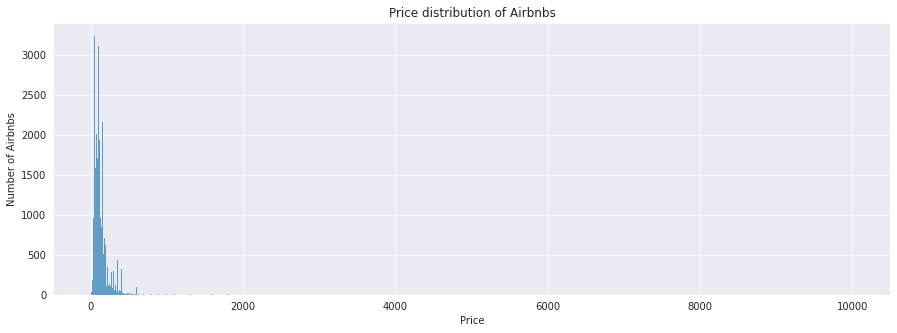

In [ ]:
# Defining the size of the graph
plt.figure(figsize=(15,5))

# Defining the labels of the graph
plt.xlabel("Price")
plt.ylabel("Number of Airbnbs")

# Plotting histogram of the price distribution
figure = sns.histplot(x='price', data=df)

# Defining the title of the graph
figure.set(title='Price distribution of Airbnbs')

# Displaying the graph
plt.show(figure)

In [ ]:
# Statistical description of price column
df['price'].describe()

count    48895.000000
mean       152.744534
std        240.144266
min         10.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

* It can be observed that 75% of the Airbnbs has a price below 200. 
* To accomodate maximum data in the histogram and to include maximum number of Airbnbs in the graph, we would be plotting a graph having Airbnb prices equal to and lesser than 200.

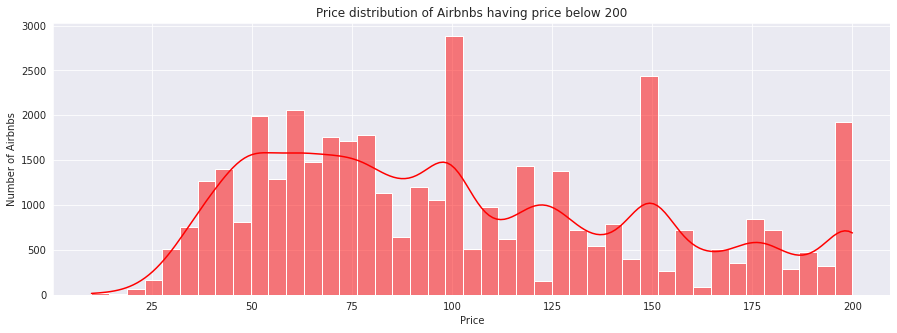

In [ ]:
# Creating a dataset where Airbnb price is equal to and below 200
price_below_200 = df[df['price']<=200]

# Defining the size of the graph
plt.figure(figsize=(15,5))

# Defining the labels of the graph
plt.xlabel("Price")
plt.ylabel("Number of Airbnbs")

# Plotting histogram of the price distribution
figure_1 = sns.histplot(x='price', data=price_below_200, kde=True, color='red')

# Defining the title of the graph
figure_1.set(title='Price distribution of Airbnbs having price below 200')

# Displaying the graph
plt.show(figure_1)

## **Top 20 neighbourhoods having maximum number of Airbnbs**

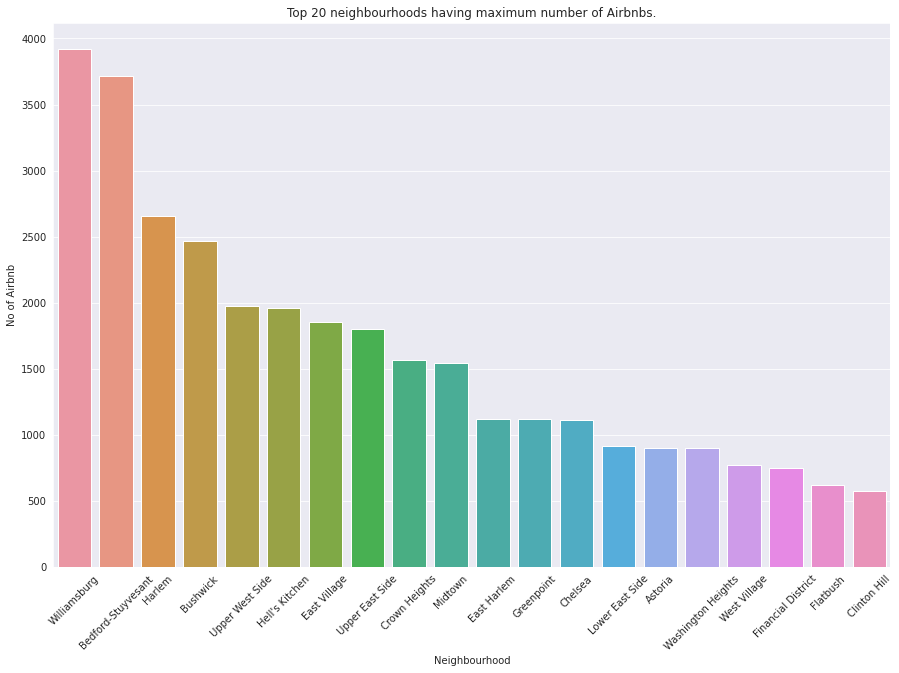

In [ ]:
# Creating a dataframe representing the top 20 neighbourhoods having maximum number of Airbnbs
cities = pd.DataFrame({'Neighbourhood':df['neighbourhood'].value_counts().index,
                       'No of Airbnb':df['neighbourhood'].value_counts().values})[:20]

# Defining the size of the plot
fig,ax=plt.subplots(figsize=(15,10))

# Defining the label and title of the graph
ax.set_xticklabels(labels=cities['Neighbourhood'],rotation=45)
ax.set_title('Top 20 neighbourhoods having maximum number of Airbnbs.')

# Plotting a bar graph
figure = sns.barplot(x='Neighbourhood',y='No of Airbnb',data=cities)
plt.show(figure)